# 퍼셉트론(Perceptron)

> 2.2.2 장에 해당하는 코드

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from utils import draw_function, check_gate, plot_dots, plot_line, draw_solution, draw_solution_by_step

## Step Function

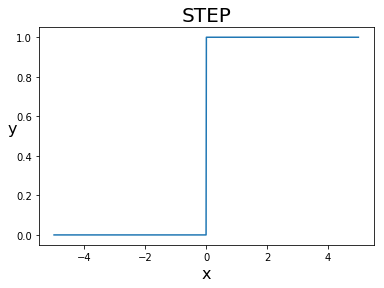

In [2]:
# 그림 2-24

def STEP(z):
    """STEP function"""
    return z > 0

draw_function(STEP)

## 논리 게이트

In [3]:
# 코드 2-1

# AND 게이트 함수 정의
def AND(x, w, b):
    z = torch.dot(x, w) + b
    a = STEP(z)
    return a

# NAND 게이트 함수 정의
def NAND(x, w, b):
    z = torch.dot(x, w) + b
    a = STEP(z)
    return a

# AND 게이트 함수 정의
def OR(x, w, b):
    z = torch.dot(x, w) + b
    a = STEP(z)
    return a

# 각 게이트에 알맞는 w, b 가중치 생성
w_and = torch.Tensor([0.5, 0.5])  
b_and = torch.Tensor([-0.7])
w_nand = torch.Tensor([-0.5, -0.5])  
b_nand = torch.Tensor([0.7])
w_or = torch.Tensor([0.5, 0.5]) 
b_or = torch.Tensor([-0.2])

# 입력 텐서를 만들어 결과 확인
X = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
for x in X:
    print("input : {}".format(x.long().tolist()))
    print(" - AND:", AND(x, w=w_and, b=b_and).item())
    print(" - NAND:", NAND(x, w=w_nand, b=b_nand).item())
    print(" - OR:", OR(x, w=w_or, b=b_or).item())
    print("--"*15)

input : [0, 0]
 - AND: 0
 - NAND: 1
 - OR: 0
------------------------------
input : [0, 1]
 - AND: 0
 - NAND: 1
 - OR: 1
------------------------------
input : [1, 0]
 - AND: 0
 - NAND: 1
 - OR: 1
------------------------------
input : [1, 1]
 - AND: 1
 - NAND: 0
 - OR: 1
------------------------------


### 다른 관점에서 퍼셉트론 이해하기

직관적인 그림으로 지금까지 소개한 AND, NAND, OR 게이트들을 이해해보자. 사실 이 모든 게이트들은 평면상에서 하나의 선으로 2종류의 점들을 분류하는 것과 같은 문제다. 선형 분류기라고 불리는 이유도 이같은 이유다.

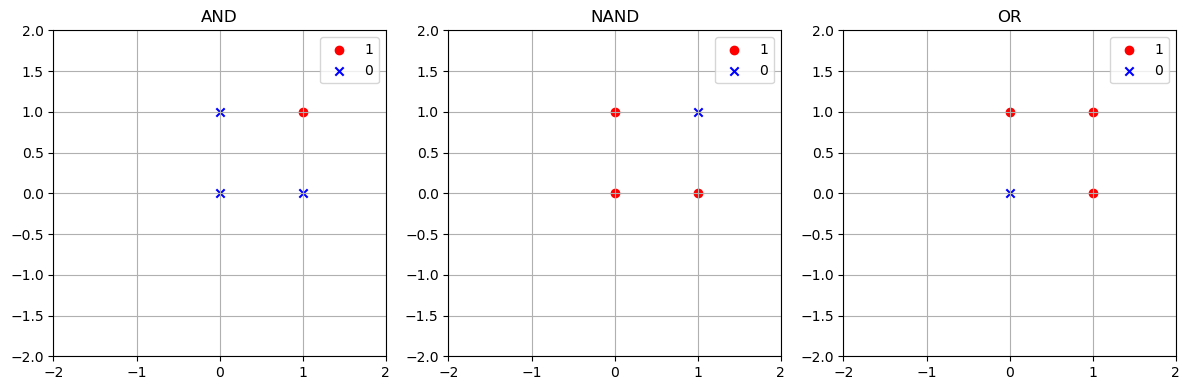

In [4]:
# 그림 2-28
fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100)
for ax, func in zip(axes, [AND, NAND, OR]):
    plot_dots(ax=ax, gate_func=func)
plt.tight_layout()
plt.show()

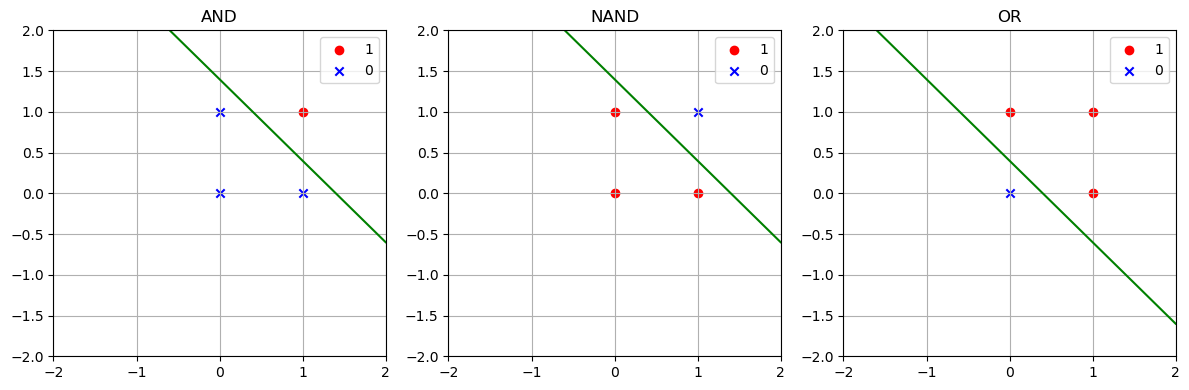

In [5]:
# 그림 2-29
fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100)
for ax, func, (w, b) in zip(axes, [AND, NAND, OR], [(w_and, b_and), (w_nand, b_nand), (w_or, b_or)]):
    plot_dots(ax=ax, gate_func=func)
    plot_line(ax=ax, w=w, b=b)
plt.tight_layout()
plt.show()

## XOR 문제

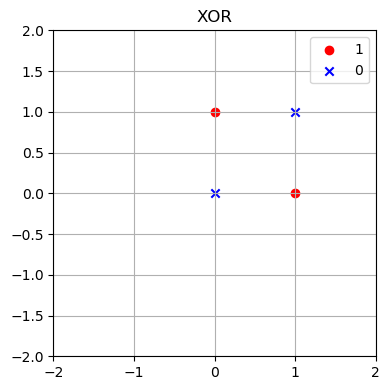

In [6]:
# 그림 2-30

def XOR():
    """empty function"""
    pass

fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=100)
plot_dots(ax=ax, gate_func=XOR)
plt.tight_layout()
plt.show()

In [7]:
# 코드 2-2

def solution(x, **kwargs):
    # 새로운 층
    s1 = NAND(x, w=kwargs['w_nand'], b=kwargs['b_nand'])
    s2 = OR(x, w=kwargs['w_or'], b=kwargs['b_or'])
    # 출력 층: s1 과 s2 를 새로운 입력으로 구성하여 전달
    y = AND(torch.Tensor([s1, s2]), w=kwargs['w_and'], b=kwargs['b_and'])
    return y

# 입력 텐서와 타겟 텐서를 생성
input_data = torch.FloatTensor([[0, 0], [1, 0], [0, 1], [1, 1]])
target_data = torch.ByteTensor([0, 1, 1, 0])

# 이전에 사용한 가중치를 dictionary 타입으로 만든다.
kwargs = dict([('w_nand', w_nand), ('b_nand', b_nand), 
               ('w_or', w_or), ('b_or', b_or), 
               ('w_and', w_and), ('b_and', b_and)])

# 테스트
for x, y in zip(input_data, target_data):
    pred = solution(x, **kwargs)
    print("predict: {} | target: {}".format(pred.numpy(), y.numpy()))

predict: [0] | target: 0
predict: [1] | target: 1
predict: [1] | target: 1
predict: [0] | target: 0


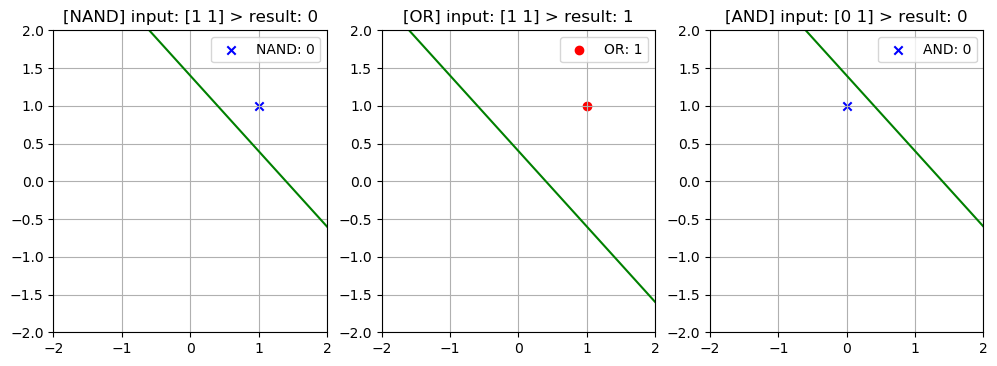

In [8]:
# fig 2.2.8

x = torch.FloatTensor([1, 1])
kwargs.setdefault('f_nand', NAND)
kwargs.setdefault('f_or', OR)
kwargs.setdefault('f_and', AND)
draw_solution_by_step(x, **kwargs)

NAND와 OR의 결과 값으로 출력된 신호들로 구성된 점이 평면상에서 다른 곳으로 이동하면서 AND 함수를 거쳐 최종 출력 신호를 만들어 냈다. 이렇게 입력과 출력 사이에 층을 더하니 다른 표현을 만들어냈고, 추가로 새로운 정보가 구성되면서 원하는 출력 신호를 얻을 수 있게 된다. 

XOR 문제를 해결한 이러한 구조를 **다층 퍼셉트론(Multi-Layer Perceptrons, MLP)** 라고한다. 입력과 출력 사이에 추가된 중간층을 **히든 레이어(hidden layer)** 라고 한다. 기존의 퍼셉트론이 선형 분류기라는 한계에 의해 XOR 문제를 해결할 수 없었다면, 다층 퍼셉트론는 입력과 출력 사이에 하나의 층을 추가해서, 선형 분류 판별선을 여러개 그리는 효과를 얻음으로써 XOR 문제를 해결할 수 있었다. 

In [9]:
# 그림 2-32

def draw_gate_area(return_fig=False):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=100)
    get_x2 = lambda x, w, b: (-w[0]*x - b) / w[1]
    w_nand, b_nand = [-0.5, -0.5], 0.7
    w_or, b_or = [0.5, 0.5], -0.2
    xx = torch.linspace(-2, 2)
    y_nand = get_x2(xx, w=w_nand, b=b_nand)
    y_or = get_x2(xx, w=w_or, b=b_or)
    ax.fill_between(xx.numpy(), y_nand.numpy(), y_or.numpy(), facecolor='g', alpha=0.3)
    plot_dots(ax=ax, gate_func=XOR)
    plot_line(ax=ax,  w=w_nand, b=b_nand)
    plot_line(ax=ax,  w=w_or, b=b_or)
    plt.tight_layout()
    plt.show()
    if return_fig:
        return fig

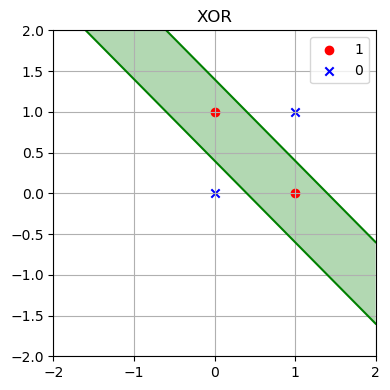

In [10]:
fig = draw_gate_area(return_fig=True)